In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
data=pd.read_csv(r"D:\BISI 2023\DS Foundation\Delhiairquality.csv")
print(data)

                  date       co     no     no2     o3     so2   pm2_5    pm10  \
0      2020-11-25 1:00  2616.88   2.18   70.60  13.59   38.62  364.61  411.73   
1      2020-11-25 2:00  3631.59  23.25   89.11   0.33   54.36  420.96  486.21   
2      2020-11-25 3:00  4539.49  52.75  100.08   1.11   68.67  463.68  541.95   
3      2020-11-25 4:00  4539.49  50.96  111.04   6.44   78.20  454.81  534.00   
4      2020-11-25 5:00  4379.27  42.92  117.90  17.17   87.74  448.14  529.19   
...                ...      ...    ...     ...    ...     ...     ...     ...   
18771  2023-01-24 4:00  1762.39   4.64   37.01  33.26   30.52  231.15  289.84   
18772  2023-01-24 5:00  1735.69   6.82   34.96  46.49   34.33  225.08  280.52   
18773  2023-01-24 6:00  1922.61   8.16   40.10  56.51   43.39  242.49  296.07   
18774  2023-01-24 7:00  1361.85   9.05   52.78  71.53  100.14  165.67  191.82   
18775  2023-01-24 8:00  1134.87   8.61   56.89  80.11  110.63  123.76  140.26   

         nh3  
0      28.63

In [65]:
data.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 1:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 2:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 3:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 4:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 5:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [66]:
# checking shape
data.shape

(18776, 9)

In [67]:
# checking info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [68]:
# finding duplicates
data.duplicated().sum()

0

In [69]:
# finding NA vaalues
data.isna().sum()

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

In [70]:
data.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000
mean,2929.228628,33.660702,66.221299,60.346239,66.693633,238.130309,300.092966,25.109815
std,2854.523506,62.127118,48.527492,80.464932,49.439191,226.533625,267.165827,26.402108
min,260.350000,0.000000,4.280000,0.000000,5.250000,11.830000,15.070000,0.000000
25%,1068.120000,0.680000,33.930000,0.340000,34.810000,84.440000,118.797500,9.630000
50%,1842.500000,5.250000,54.150000,27.180000,52.930000,157.445000,209.705000,17.480000
75%,3685.000000,35.760000,83.630000,92.980000,82.020000,313.000000,387.965000,30.400000
max,21148.680000,500.680000,460.620000,801.090000,579.830000,1708.090000,1969.930000,287.770000


In [71]:
# converting date feature to datetime type
data['date']=pd.to_datetime(data['date'], infer_datetime_format=True)
data['date']

0       2020-11-25 01:00:00
1       2020-11-25 02:00:00
2       2020-11-25 03:00:00
3       2020-11-25 04:00:00
4       2020-11-25 05:00:00
                ...        
18771   2023-01-24 04:00:00
18772   2023-01-24 05:00:00
18773   2023-01-24 06:00:00
18774   2023-01-24 07:00:00
18775   2023-01-24 08:00:00
Name: date, Length: 18776, dtype: datetime64[ns]

In [72]:
# feature extraction
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['weekday']=data['date'].dt.day_name()
data['hour'] = data['date'].dt.hour

In [73]:
# adding seasons
seasons = { 1:'Winter', 2:'Winter', 3:'Summer', 4:'Summer', 5:'Summer',
           6:'Monsoon', 7:'Monsoon', 8:'Monsoon',9:'Monsoon', 10:'Autumn', 11:'Autumn',12:'Winter',}
data['seasons']=data['month'].map(seasons)
data.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,year,month,day,weekday,hour,seasons
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,2020,11,25,Wednesday,1,Autumn
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,2020,11,25,Wednesday,2,Autumn
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,2020,11,25,Wednesday,3,Autumn
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,2020,11,25,Wednesday,4,Autumn
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,2020,11,25,Wednesday,5,Autumn


# 1)carbon monoxide (CO) effect on air quality

CO is a colorless, odorless gas formed by the incomplete reaction of air with fuel. CO pollution occurs primarily from emissions produced by fossil fuel–powered engines, including motor vehicles and non-road engines and vehicles (such as construction equipment and boats).


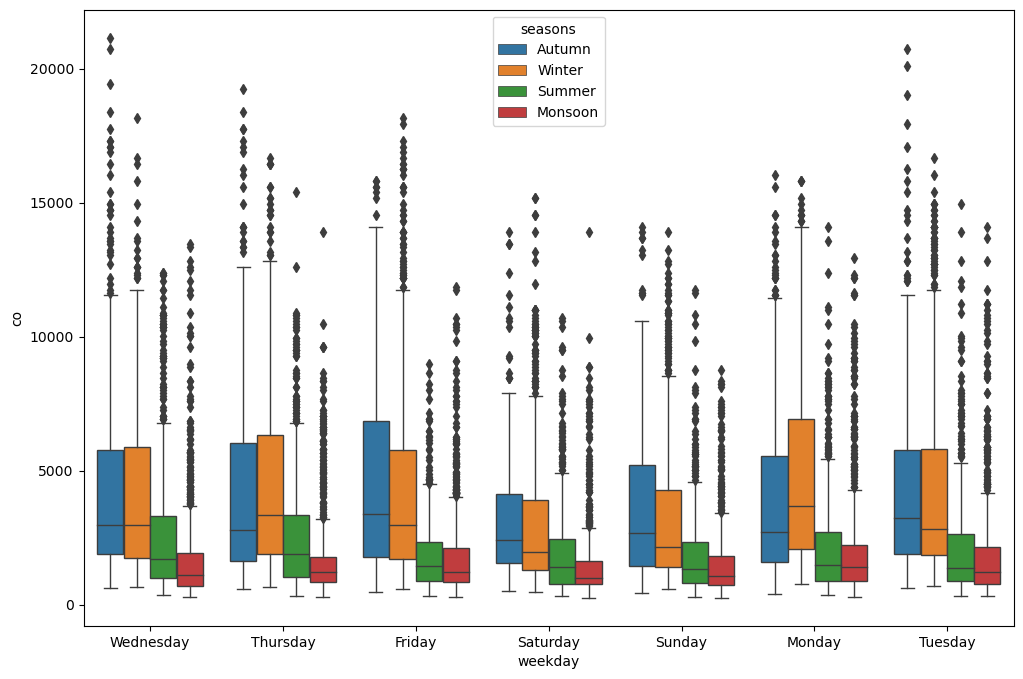

In [74]:
 ##carbon monoxide during weekdays of different seasons
fig, ax= plt.subplots(figsize=(12,8))
sns.boxplot(data=data,x='weekday',y='co',hue='seasons',ax=ax,linewidth=1)
plt.show()


Here we can see during winter and autumn season the CO is very large in air because in thata seasons air is dense so that affects CO. also show that during weekend CO is less as compared to weekdays because higher levels of CO occures due to heavy traffic congestion in delhi.so try to implant schemes such as odd-even vehicle days to minimize traffic congestion.

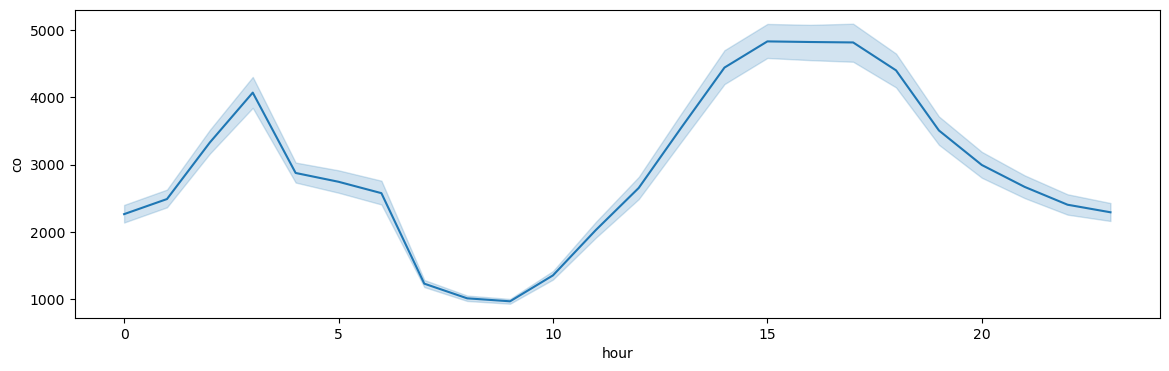

In [75]:
# CO during different hours 
plt.figure(figsize=(14,4))
sns.lineplot(x='hour', y='co', data=data)
plt.show()

In morning the CO shows less as time goes from afternoon to night the CO goes on incresing due to heavy traffic and fatory hours.

# 2) nitrogen oxide (no) effect on air quality

Nitrogen oxides are critical components of photochemical smog. They produce the yellowish-brown colour of the smog. In poorly ventilated situations, indoor domestic appliances such as gas stoves and gas or wood heaters can be significant sources of nitrogen oxides. Smog is air pollution that reduces visibility

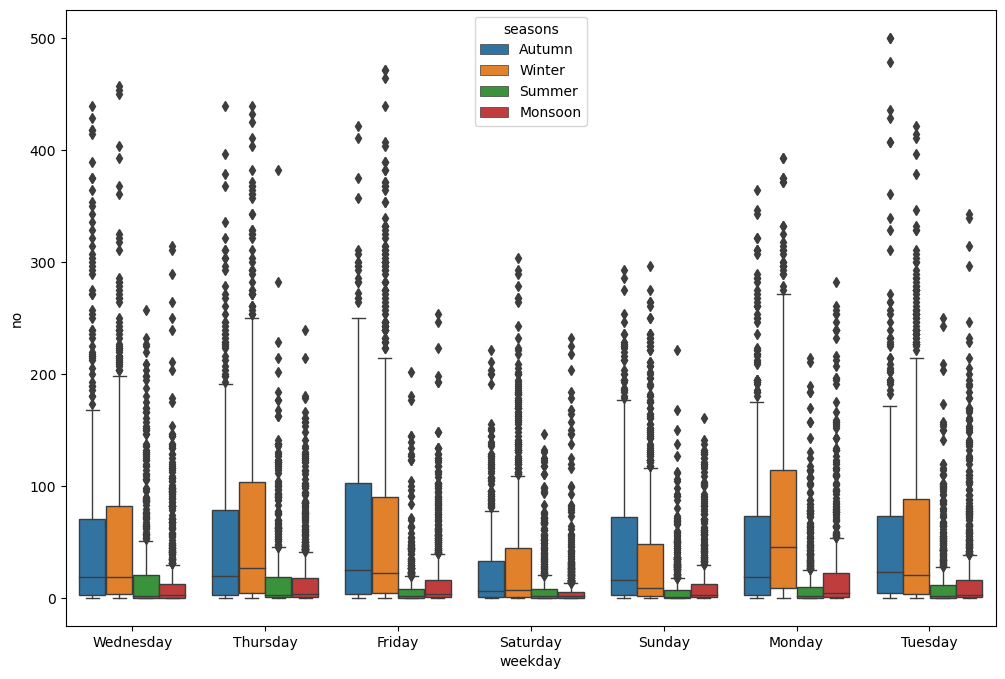

In [29]:
# nitrogen oxide during weekdays of different seasons
fig, ax= plt.subplots(figsize=(12,8))
sns.boxplot(data=data,x='weekday',y='no',hue='seasons',ax=ax,linewidth=1)
plt.show()

here we can see Nitrogen oxide is largely in air during winter season as compared to all other seasons because in delhi winter season due to the continuation of prevailing light winds and high moisture near the surface over the Indo-Gangetic plains high fog is there plus due to increase in NO smog is also increases (whereas smog is a serious air pollutant that combines fog and smoke) Smog is formed by mixing air with pollutants and exhaust gases resulting from human activities. The factors which are responsible for this is large numbers of factories, an increasing number of cars in delhi so act on it to reduce nitrogen oxide.

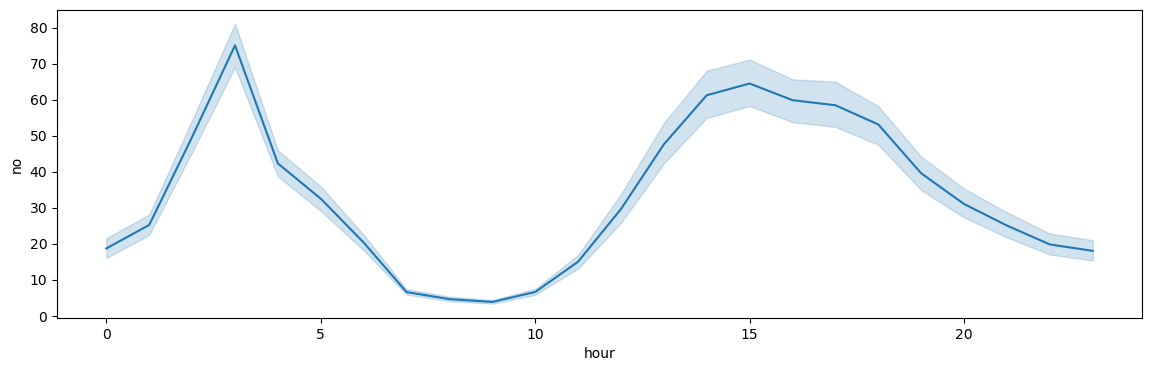

In [76]:
# NO during different hours 
plt.figure(figsize=(14,4))
sns.lineplot(x='hour', y='no', data=data)
plt.show()

nitrogen oxide is less in morning session as compared to other offices,schools and factories hours. thats why visibility is very less in the evening and night time in delhi